## SPAM COMMENT CLASSIFIER

### Data Preparation
At this stage we will take data from existing sources, and take a general look at the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aditc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Import Dataset
dataset = pd.read_excel(r'Comment Spam.xls', names = ['No', 'Comment', 'Label'])

In [4]:
dataset.drop('No', axis = 1, inplace = True)

In [5]:
dataset.shape

(1300, 2)

In [6]:
dataset.head(10)

Comment  Label
0                                this song is racist      0
1  and how many subscribers compared to her over ...      1
2  HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...      1
3                                  well done shakira      0
4                 :D subscribe to me for daily vines      1
5  Part 2. Holy Mary, pray for us Holy Mother of ...      1
6   I really can&#39;t comprehend Miley Cyrus , s...      1
7                                      Nice song ^_^      0
8                   This makes me miss the world cup      0
9  ******* Facebook is LAME and so 2004! Check ou...      1

In [7]:
# Check missing value in Dataset
dataset.isnull().sum()

Comment    0
Label      0
dtype: int64

In [8]:
dataset.shape

(1300, 2)

### Text Preprocessing (Data Cleansing)
At this stage we will carry out the following process:
1. Cleaning symbols in sentences
2. Make sentences lowercase (because it is case sensitive)
3. Tokenization process (break sentences into smaller elements, the process here breaks down to words only)
4. Remove common words in English (because the comments are assumed only contain English words)
5. The word will use stemming and lemmatization processes to equate words that have different writings but have the same meaning
6. Combine all clean words into sentences and combine them into a list
7. From these words a vector will be created to calculate the frequency of each word per comment per rows of data (the output will be a feature that can be processed in machine learning models)

In [9]:
# Import libraries for Text Processing
# NLTK is Natural Language Toolkit

#Stopwords
from nltk.corpus import stopwords

#Stemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
porstem = PorterStemmer()
lancaster = LancasterStemmer()
snowball = SnowballStemmer(language='english')

#Lemmatizer
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
# Create Function to Cleansing format of text in dataset (with Stemming)
bow_stem = []
for i in range(0, len(dataset)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset['Comment'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [porstem.stem(word) for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    bow_stem.append(cleaning)

In [11]:
# Create Function to Cleansing format of text in dataset (with Lemmatize)
bow_lem = []
for i in range(0, len(dataset)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset['Comment'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [lemmatizer.lemmatize(word) for word in cleaning if not word in set(stopwords.words('english'))]
    cleaning = ' '.join(cleaning)
    bow_lem.append(cleaning)

In [12]:
# Output in Stemming
bow_stem[:5]

['song racist',
 'mani subscrib compar million',
 'hi check awesom cover say think',
 'well done shakira',
 'subscrib daili vine']

In [13]:
# Output for Lemmatize
bow_lem[:5]

['song racist',
 'many subscriber compared million',
 'hi check awesome cover say think',
 'well done shakira',
 'subscribe daily vine']

In [14]:
# CountVectorizer to create matrix count word in text (Stemming Ouput)
from sklearn.feature_extraction.text import CountVectorizer
cvstem = CountVectorizer()
X_stem = cvstem.fit_transform(bow_stem).toarray()

In [15]:
X_stem.shape

(1300, 2336)

In [16]:
# CountVectorizer to create matrix count word in text (Lemmatize Ouput)
from sklearn.feature_extraction.text import CountVectorizer
cvlem = CountVectorizer()
X_lem = cvlem.fit_transform(bow_lem).toarray()

In [17]:
# Example of Countvectorizer
X_stem_df = pd.DataFrame(X_stem, columns = cvstem.get_feature_names())
X_stem_df.head(10)

aaaaaaa  abba  abl  ablaz  abomin  absolut  absorb  abus  acaer  access  \
0        0     0    0      0       0        0       0     0      0       0   
1        0     0    0      0       0        0       0     0      0       0   
2        0     0    0      0       0        0       0     0      0       0   
3        0     0    0      0       0        0       0     0      0       0   
4        0     0    0      0       0        0       0     0      0       0   
5        0     0    0      0       0        0       0     0      0       0   
6        0     0    0      0       0        0       0     0      0       0   
7        0     0    0      0       0        0       0     0      0       0   
8        0     0    0      0       0        0       0     0      0       0   
9        0     0    0      0       0        0       0     0      0       0   

   ...  yt  ytma  yuliya  yust  yuttx  zealou  zesti  zip  zombi  zonepa  
0  ...   0     0       0     0      0       0      0    0      0       0  
1  ...   0     0       0     0      0       0      0    0      0       0  
2  ...   0     0       0     0      0       0      0    0      0       0  
3  ...   0     0       0     0      0       0      0    0      0       0  
4  ...   0     0       0     0      0       0      0    0      0       0  
5  ...   0     0       0     0      0       0      0    0      0       0  
6  ...   0     0       0     0      0       0      0    0      0       0  
7  ...   0     0       0     0      0       0      0    0      0       0  
8  ...   0     0       0     0      0       0      0    0      0       0  
9  ...   0     0       0     0      0       0      0    0      0       0  

[10 rows x 2336 columns]

**Our Data is Clean and Ready to Consume to Model**

### Exploratory Data Analysis (EDA)
At this stage we will carry out the following process:
1. Visualize the effect of sentence length on data labels
2. Visualize the proportions of the data labels (if they are not balanced then further treatment needs to be done)
3. Create a visual wordcloud of each data label (Spam and Not Spam)

In [18]:
dataset.head()

Comment  Label
0                                this song is racist      0
1  and how many subscribers compared to her over ...      1
2  HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...      1
3                                  well done shakira      0
4                 :D subscribe to me for daily vines      1

In [19]:
# Convert Label data to Category
dataset['Category'] = dataset['Label'].map({1 : 'Spam', 0: 'Not Spam'})

In [20]:
# Create length of text
dataset['Length'] = dataset['Comment'].apply(len)

In [21]:
dataset

Comment  Label  Category  \
0                                   this song is racist      0  Not Spam   
1     and how many subscribers compared to her over ...      1      Spam   
2     HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...      1      Spam   
3                                     well done shakira      0  Not Spam   
4                    :D subscribe to me for daily vines      1      Spam   
...                                                 ...    ...       ...   
1295                                      Awsome<br />﻿      0  Not Spam   
1296                https://www.tsu.co/KodysMan plz ^^﻿      1      Spam   
1297  Sign up for free on TSU and start making money...      1      Spam   
1298  MEGAN FOX AND EMINEM TOGETHER IN A VIDEO  DOES...      0  Not Spam   
1299                              Great.This is a song﻿      0  Not Spam   

      Length  
0         19  
1         55  
2         57  
3         17  
4         34  
...      ...  
1295      13  
1296      35  
1297     129  
1298      70  
1299      21  

[1300 rows x 4 columns]

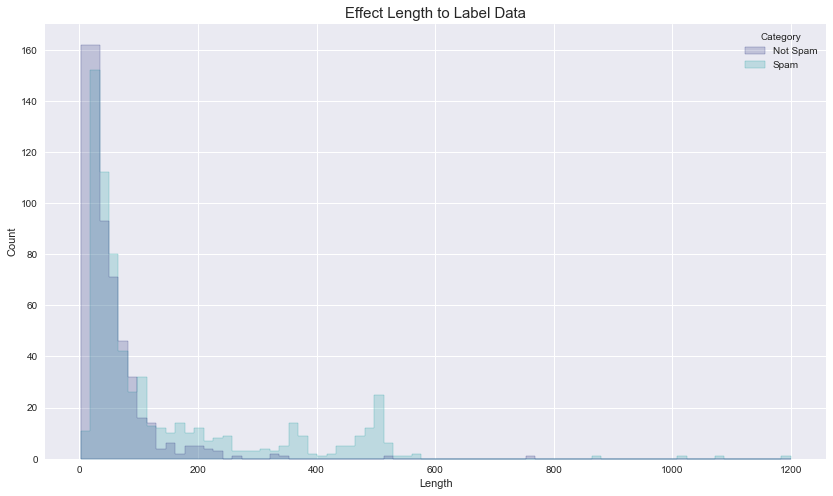

In [22]:
# Visualization Length of text and Label Data
plt.figure(figsize=(14,8))
sns.histplot(dataset, x="Length", hue="Category", element="step", palette = 'mako', bins = 75)
plt.title('Effect Length to Label Data', fontsize=15)
plt.show()

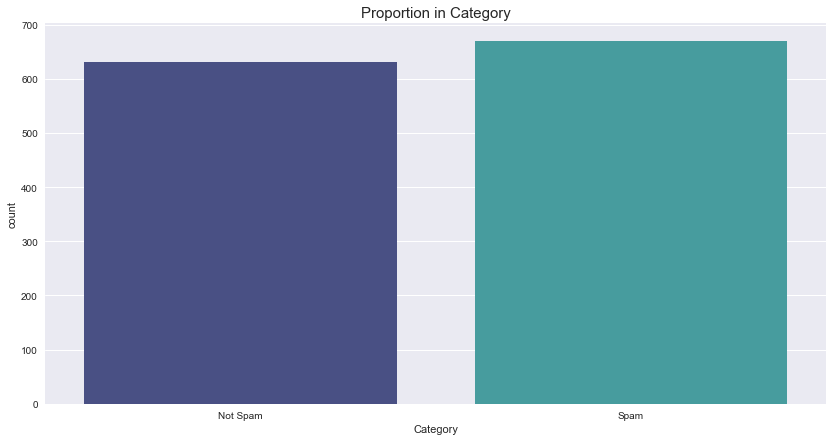

In [23]:
# Visualization Proportion Spam and Not Spam

plt.figure(figsize=(14,7))
sns.countplot(dataset['Category'],palette = 'mako')
plt.title('Proportion in Category', fontsize=15)
plt.show()

**It is assumed that the proportion of data does not occur imbalance**

**Make Visualization Top Word in Spam and Non-Spam Label**, but we need to transform data to get that

In [24]:
# Make top word per category
dataset_spam = dataset[dataset['Label'] != 0]
dataset_nspam = dataset[dataset['Label'] == 0]

dataset_spam.reset_index(drop=True, inplace=True)
dataset_nspam.reset_index(drop=True, inplace=True)

In [25]:
# Cleansing Format and Make CountWord in Dataset_Spam
for i in range(0, len(dataset_spam)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset_spam['Comment'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [word for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    dataset_spam['Comment'][i] = dataset_spam['Comment'][i].replace(dataset_spam['Comment'][i], cleaning)

from sklearn.feature_extraction.text import CountVectorizer
cvspam = CountVectorizer()
cvspam.fit_transform(dataset_spam['Comment'])
data_spam = pd.DataFrame(cvspam.vocabulary_.items(), columns = ['Word', 'Count'])

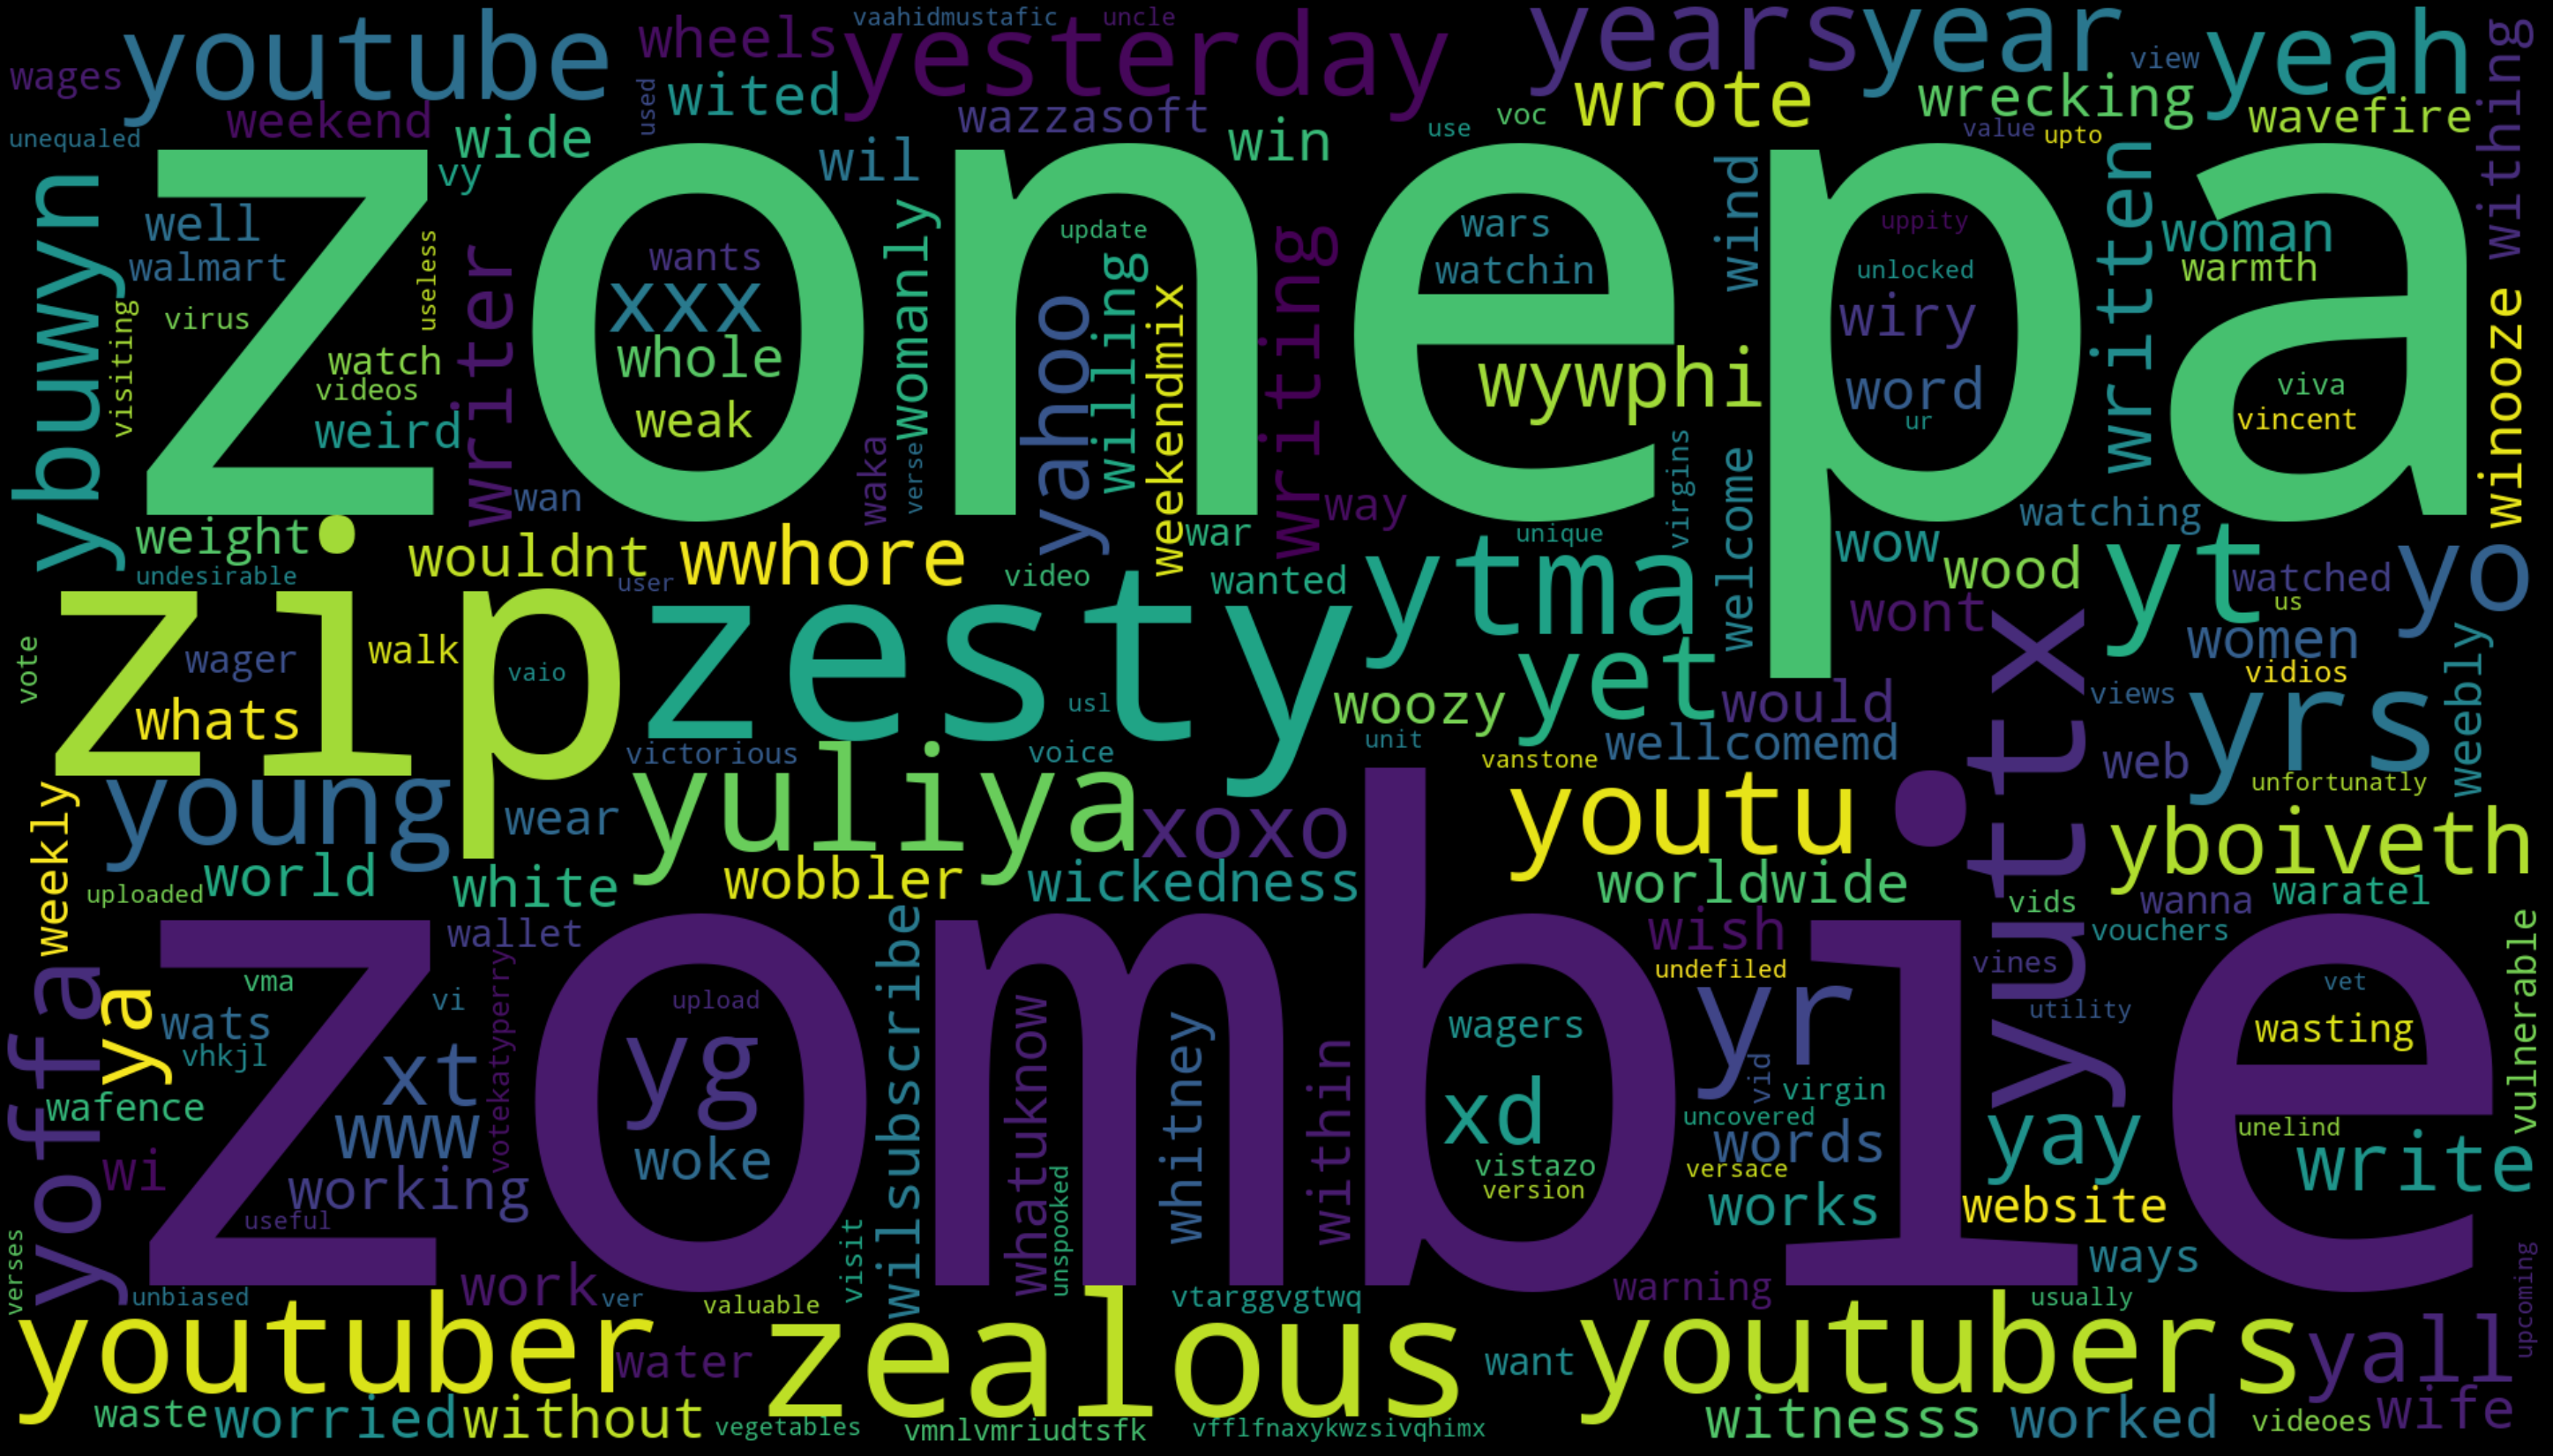

In [26]:
# Visualize Top Word in WordCloud for Spam Label
from wordcloud import WordCloud, STOPWORDS
a = cvspam.vocabulary_

wordcloud = WordCloud(
    width = 1900,
    height = 1080,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(frequencies=a)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
# Top 10 Word in Spam Label
data_spam.sort_values(by = 'Count',ascending=False)[:10]

Word  Count
224    zonepa   2138
2128   zombie   2137
946       zip   2136
839     zesty   2135
755   zealous   2134
1011    yuttx   2133
904    yuliya   2132
1326     ytma   2131
2078       yt   2130
1250      yrs   2129

In [28]:
# Cleansing Format and Make CountWord in Dataset_NSpam
for i in range(0, len(dataset_nspam)):
    cleaning = re.sub(r'https?:\/\/\S*', '', dataset_nspam['Comment'][i], flags=re.MULTILINE)
    cleaning = re.sub('[^a-zA-Z]', ' ', cleaning)
    cleaning = cleaning.lower()
    cleaning = cleaning.split()
    
    cleaning = [word for word in cleaning if not word in stopwords.words('english')]
    cleaning = ' '.join(cleaning)
    dataset_nspam['Comment'][i] = dataset_nspam['Comment'][i].replace(dataset_nspam['Comment'][i], cleaning)

from sklearn.feature_extraction.text import CountVectorizer
cvnspam = CountVectorizer()
cvnspam.fit_transform(dataset_nspam['Comment'])
data_nspam = pd.DataFrame(cvnspam.vocabulary_.items(), columns = ['Word', 'Count'])

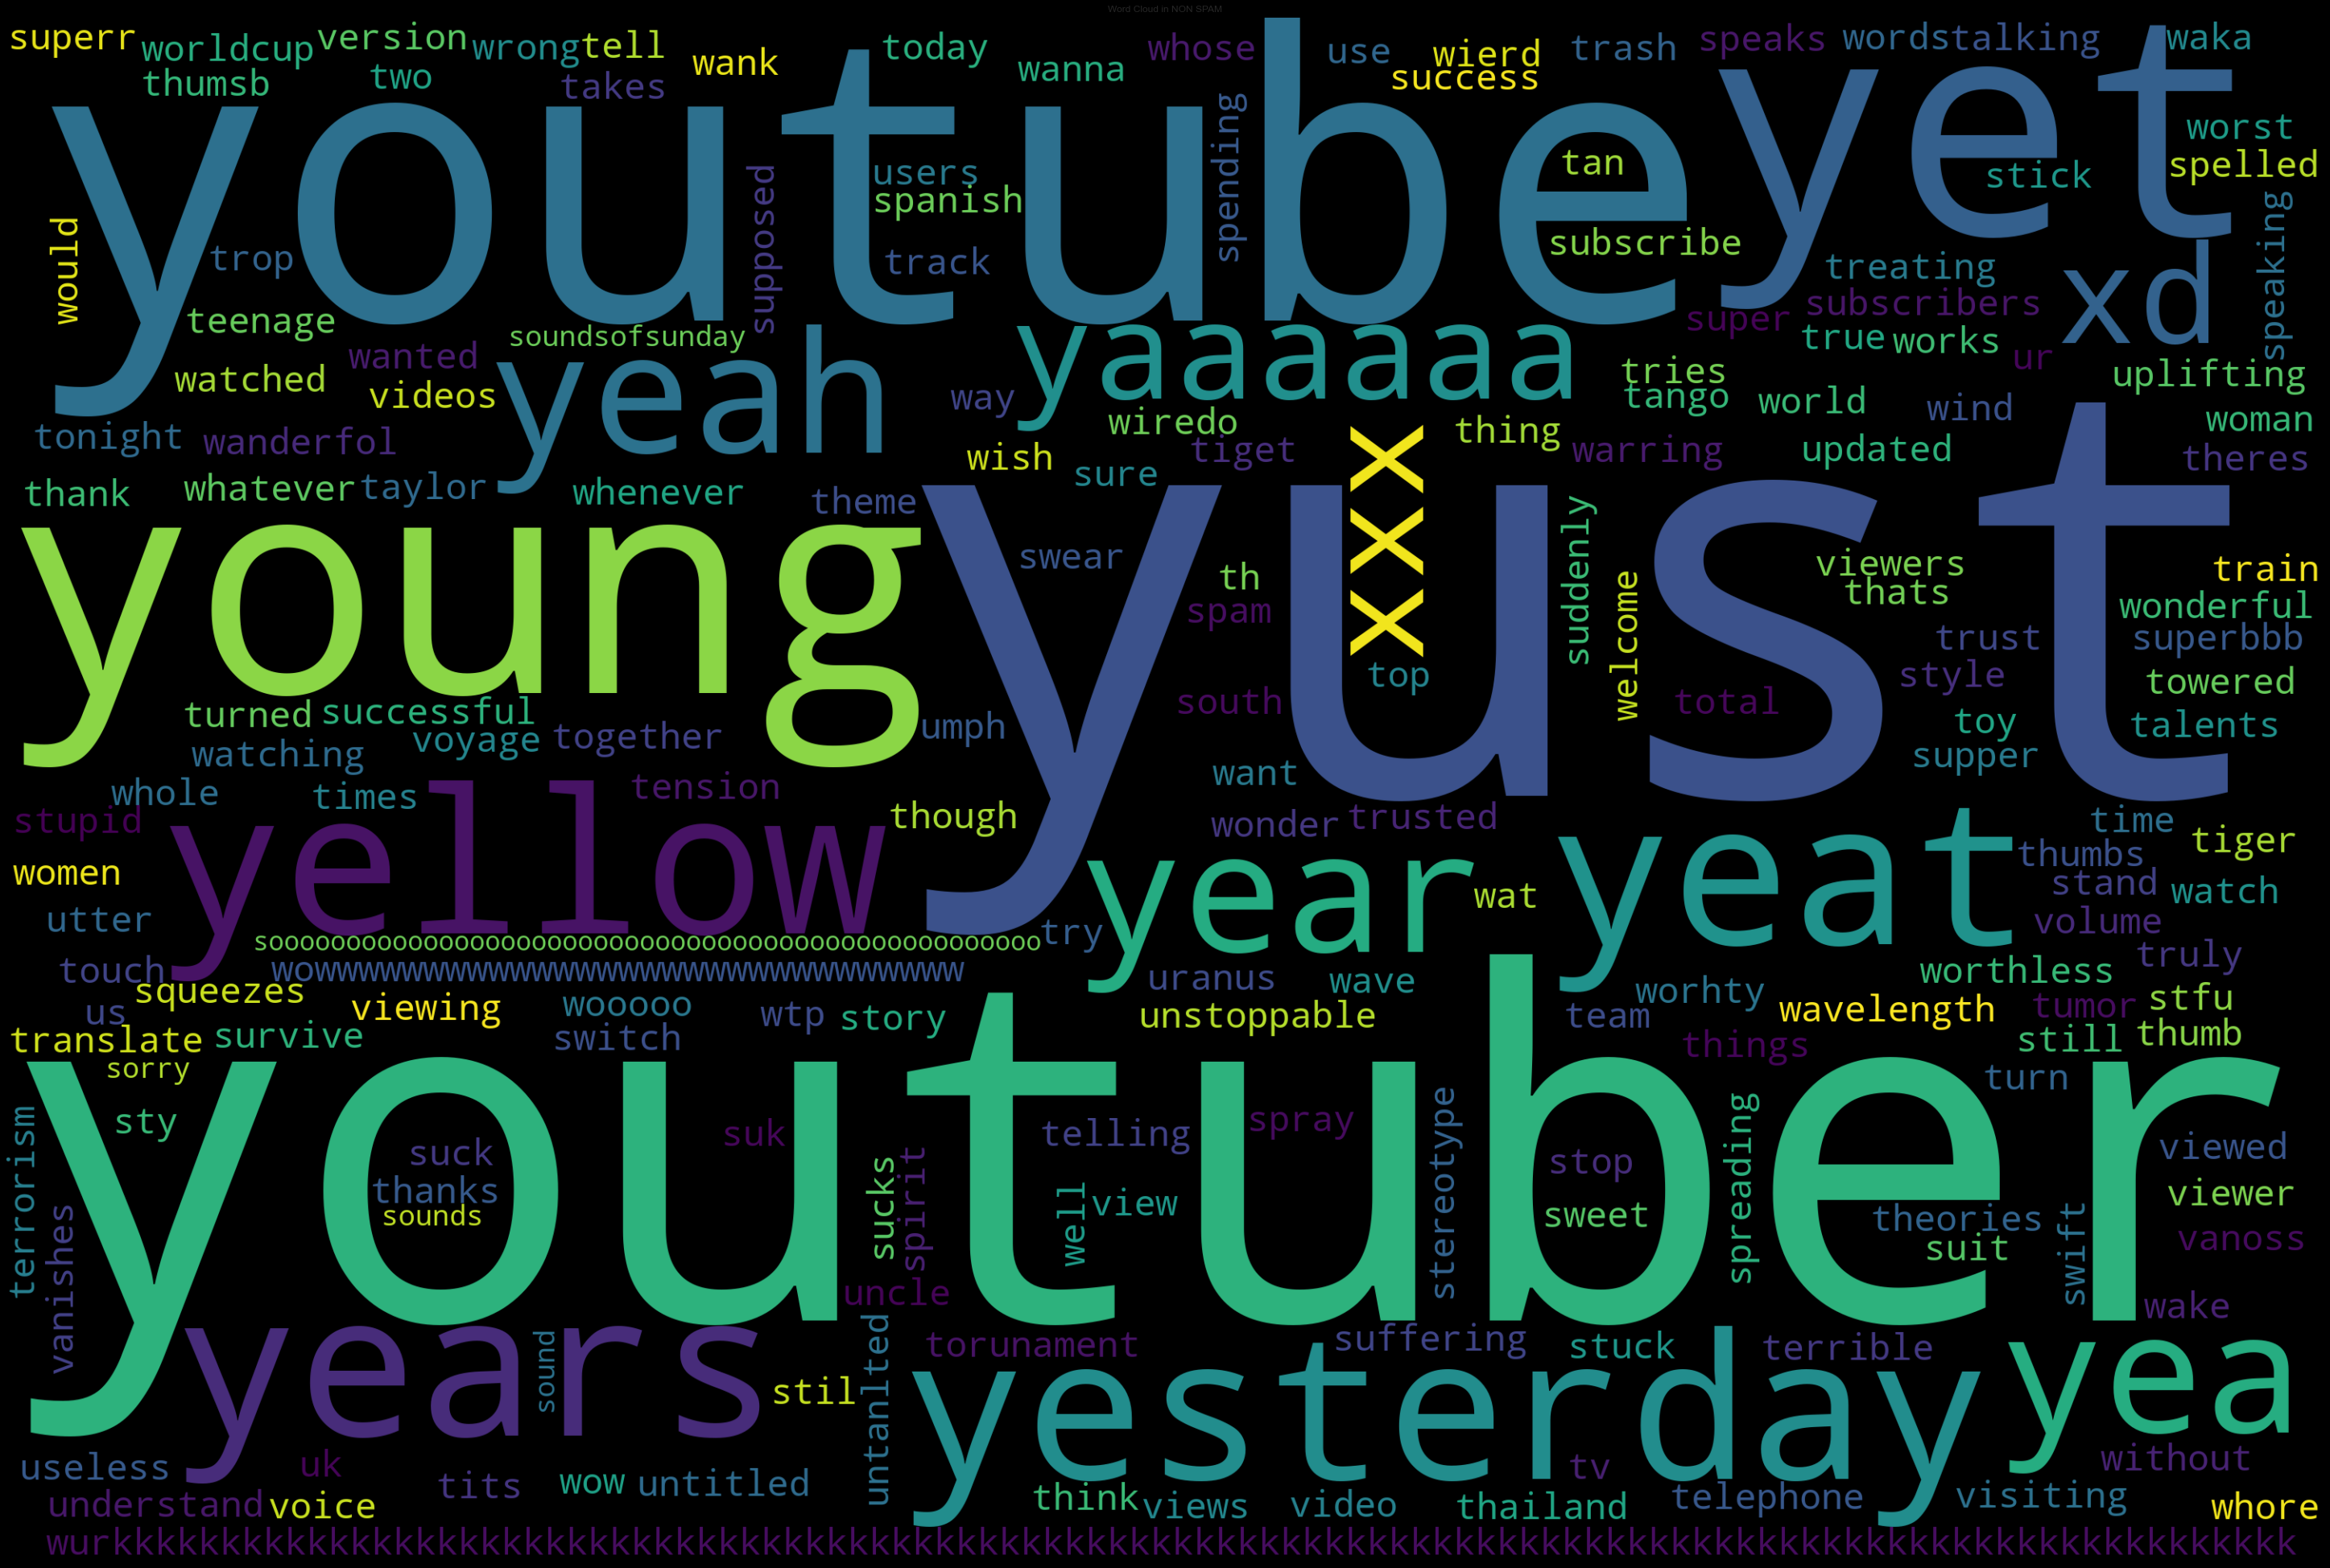

In [29]:
# Visualize Top Word in WordCloud for Non-Spam Label
from wordcloud import WordCloud, STOPWORDS
b = cvnspam.vocabulary_

wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(frequencies=b)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.title("Word Cloud in NON SPAM")
plt.show()

In [30]:
# Top 10 Word in Non-Spam Label
data_nspam.sort_values(by = 'Count',ascending=False)[:10]

Word  Count
401       yust   1021
659   youtuber   1020
250    youtube   1019
441      young   1018
92         yet   1017
410  yesterday   1016
280     yellow   1015
343       yeat   1014
342      years   1013
311       year   1012

### Machine Learning Modelling
At this stage we will carry out the following process:
1. Splitting data into test and train data
2. Modeling processed data with Machine Learning models
3. Taking the best model based on the highest accuracy value

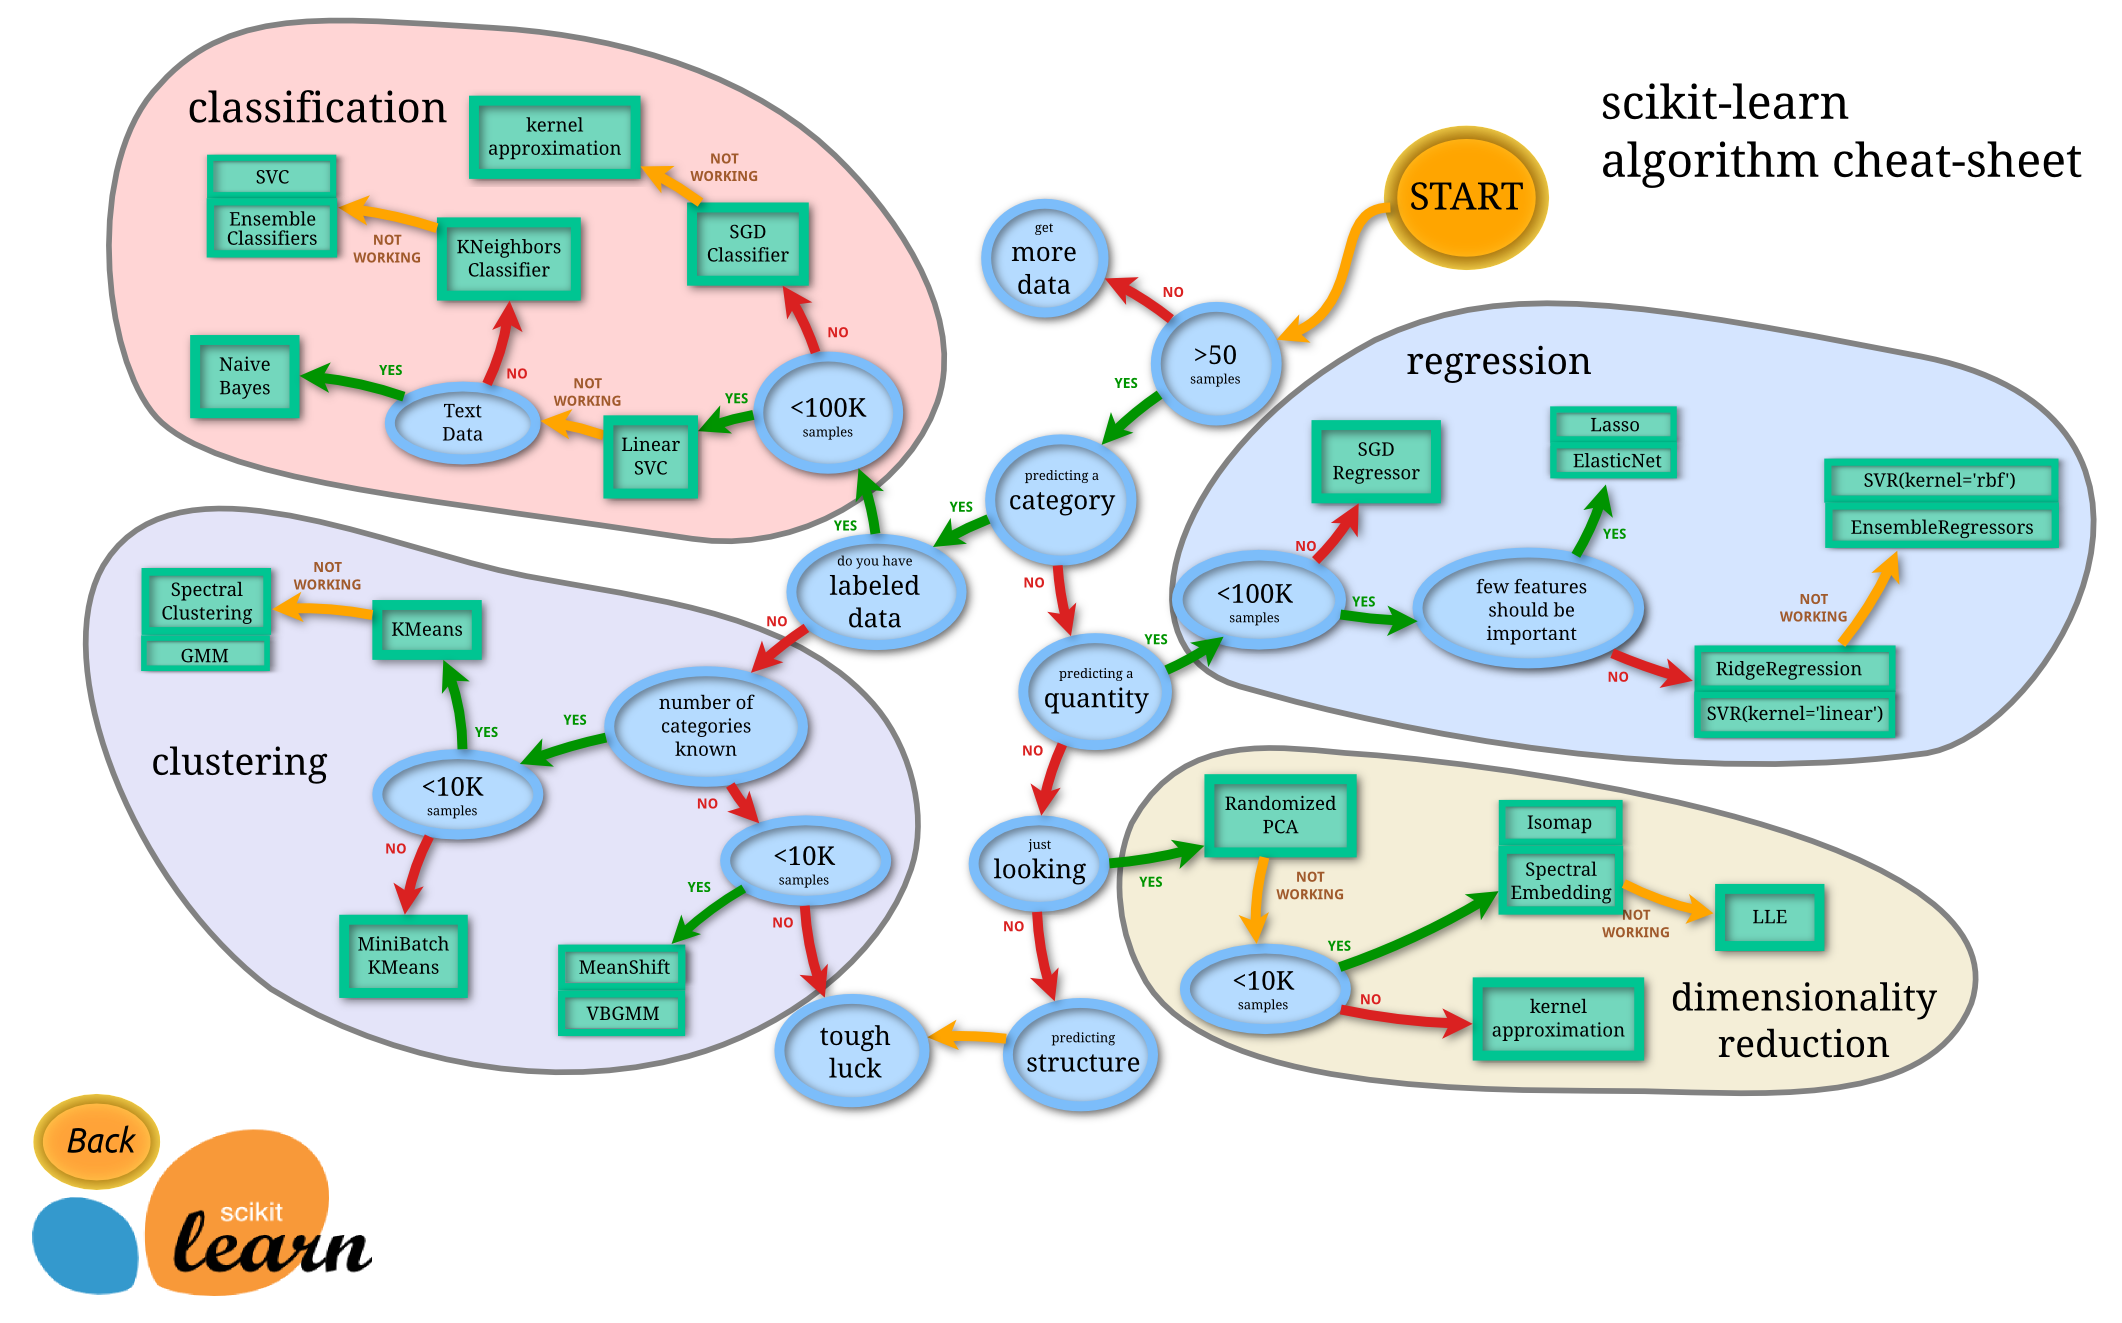

In [31]:
from IPython.display import Image
Image(r"C:\Users\aditc\Documents\Learning\NLP Project\Cheat-Sheet-Scikit-learn.png")

I use this **cheat sheet** as a guide for choosing the right machine learning algorithm, in this **scikit-learn cheat sheet** it is explained that the right method is the Naive Bayes algorithm for text processing.
So, I will use 3 models of naive bayes :
1. Multinomial Naive Bayes
2. Gaussian Naive Bayes
3. Bernoulli Naive Bayes

In [32]:
# Import Libraries of Model
from sklearn.naive_bayes import GaussianNB #Gaussian Naive Bayes
from sklearn.naive_bayes import MultinomialNB #Multinomial Naive Bayes
from sklearn.naive_bayes import BernoulliNB #Bernoulli Naive Bayes

In [33]:
X_stem.shape

(1300, 2336)

In [34]:
#Get Best Value From Stem Technique on Base Model Machine Learning
GB = GaussianNB()
MB = MultinomialNB()
BB = BernoulliNB()
y = dataset['Label'].values

stem_score = {}

#Split Data Train and Test for Vector Data Stem
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stem, y, test_size = 0.20, random_state = 0)

#GaussianNB
spam_GB = GB.fit(X_train, y_train)
y_pred_GB = spam_GB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelGB = accuracy_score(y_test, y_pred_GB)
stem_score['GaussianNB_stem'] = accuracy_spam_modelGB


#MultinomialNB
spam_MB = MB.fit(X_train, y_train)
y_pred_MB = spam_MB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelNB = accuracy_score(y_test, y_pred_MB)
stem_score['MultinomialNB_stem'] = accuracy_spam_modelNB


#BernoulliNB
spam_BB = BB.fit(X_train, y_train)
y_pred_BB = spam_BB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelBB = accuracy_score(y_test, y_pred_BB)
stem_score['BernoulliNB_stem'] = accuracy_spam_modelBB

In [35]:
#Get Best Value From Lemmatize Technique on Base Model Machine Learning
GB = GaussianNB()
MB = MultinomialNB()
BB = BernoulliNB()
y = dataset['Label'].values

lem_score = {}

#Split Data Train and Test for Vector Data Stem
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_lem, y, test_size = 0.20, random_state = 0)

#GaussianNB
spam_GB = GB.fit(X_train, y_train)
y_pred_GB = spam_GB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelGB = accuracy_score(y_test, y_pred_GB)
lem_score['GaussianNB_lem'] = accuracy_spam_modelGB


#MultinomialNB
spam_MB = MB.fit(X_train, y_train)
y_pred_MB = spam_MB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelNB = accuracy_score(y_test, y_pred_MB)
lem_score['MultinomialNB_lem'] = accuracy_spam_modelNB


#BernoulliNB
spam_BB = BB.fit(X_train, y_train)
y_pred_BB = spam_BB.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_spam_modelBB = accuracy_score(y_test, y_pred_BB)
lem_score['BernoulliNB_lem'] = accuracy_spam_modelBB

In [36]:
#Best Score between Stemming and Lemmatize using Naive Bayes Model
max(max(stem_score.items()), max(lem_score.items()))

('MultinomialNB_stem', 0.9192307692307692)

The best model of the three models is **Multinomial Naive Bayes** by looking only at the accuracy value.

Hyper tuning process is not carried out (enough time is given but it is constrained because while working too)